In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions

**Importing the dataset**

In [ ]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df.drop(columns=['User ID'])

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
df['Gender']=df['Gender'].map({'Male':0 , 'Female':1})

**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
x=df[['Gender','Age','EstimatedSalary']].values
y=df['Purchased'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train1=scaler.transform(x_train)
x_test1=scaler.transform(x_test)

**Fitting K-NN to the Training set**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import cross_val_score
for i in [1,2,3,5,6,7,8,9,10,20,50]:
  knn=KNeighborsClassifier(i)
  knn.fit(x_train1,y_train)
  print("k value: ",i,'trainscore:',knn.score(x_train1,y_train) ,'score:' ,np.mean(cross_val_score(knn,x_train1,y_train,cv=10))) 

k value:  1 trainscore: 1.0 score: 0.8785714285714287
k value:  2 trainscore: 0.9321428571428572 score: 0.8785714285714287
k value:  3 trainscore: 0.9321428571428572 score: 0.9142857142857143
k value:  5 trainscore: 0.9285714285714286 score: 0.9107142857142856
k value:  6 trainscore: 0.9321428571428572 score: 0.9142857142857143
k value:  7 trainscore: 0.925 score: 0.9178571428571427
k value:  8 trainscore: 0.9285714285714286 score: 0.925
k value:  9 trainscore: 0.9321428571428572 score: 0.925
k value:  10 trainscore: 0.925 score: 0.9142857142857143
k value:  20 trainscore: 0.9178571428571428 score: 0.8892857142857145
k value:  50 trainscore: 0.7892857142857143 score: 0.7642857142857142


**Predicting the Test set results**

In [ ]:
knn = KNeighborsClassifier(5)
knn.fit(x_train1,y_train)
knn.score(x_test1,y_test)

0.875

In [ ]:
y_pred=knn.predict(x_test1)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix,plot_roc_curve
confusion_matrix(y_test,y_pred)

array([[76, 10],
       [ 5, 29]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


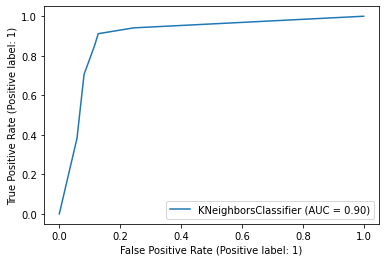

In [ ]:
plot_roc_curve(knn,x_test1,y_test)
